In [1]:
#导入requests,lxml,tqdm,time,random,pandas, re库
import requests
from lxml import etree
from tqdm import tqdm
import time
import random
import pandas as pd
import re

In [2]:
name_list, content_list, date_list, score_list, city_list = [], [], [], [], []
movie_name = ""

In [3]:
def get_city(url, i):
    time.sleep(round(random.uniform(2, 3), 2))
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36'}
    cookies = {'cookie': 'll="118282"; bid=S0MmtH4kS6k; ps=y; __yadk_uid=MDNn1TtApk4Qy05EsFfRylVOz7QEtwfv; push_doumail_num=0; push_noty_num=0; _vwo_uuid_v2=DE1E630EF0AF9D0E61FED44B14BC4C70E|eaca04a1c816dd5db9de663c65c0dee3; __utmc=30149280; ue="Kaimengcutie@163.com"; dbcl2="184440422:owPxTLD4CIQ"; ck=mElb; ap_v=0,6.0; __utmv=30149280.18444; _pk_ref.100001.8cb4=%5B%22%22%2C%22%22%2C1536746909%2C%22https%3A%2F%2Fwww.baidu.com%2Flink%3Furl%3DmONoqftz9YMbzn2W2riSoPb0SbRs8_kF82AZ-Kime7SKrKoGYyby_SrolwezF_RO%26wd%3D%26eqid%3Db6f452ab00035a94000000065b98e596%22%5D; _pk_ses.100001.8cb4=*; __utma=30149280.522800422.1535824046.1536743277.1536746909.8; __utmz=30149280.1536746909.8.8.utmcsr=baidu|utmccn=(organic)|utmcmd=organic; __utmt_douban=1; douban-profile-remind=1; _pk_id.100001.8cb4=c8d8fad70399bf01.1535824045.7.1536747498.1536743604.; __utmb=30149280.14.10.1536746909'}  # 2018.7.25修改，
    res = requests.get(url, cookies=cookies, headers=headers)
    if (res.status_code == 200):
        print("\n成功获取第{}个用户城市信息！".format(i))
    else:
        print("\n第{}个用户城市信息获取失败".format(i))
    pattern = re.compile('<div class="user-info">.*?<a href=".*?">(.*?)</a>', re.S)
    item = re.findall(pattern, res.text)  # list类型
    return (item[0])  # 只有一个元素，所以直接返回

In [4]:
def get_content(id, page):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36'}
    cookies = {'cookie': 'll="118282"; bid=S0MmtH4kS6k; ps=y; push_doumail_num=0; push_noty_num=0; __yadk_uid=UIgt381yVmPN6rgJD7YbDw5TuFIwCoC1; _vwo_uuid_v2=DE1E630EF0AF9D0E61FED44B14BC4C70E|eaca04a1c816dd5db9de663c65c0dee3; __utmc=30149280; __utmc=223695111; ue="Kaimengcutie@163.com"; dbcl2="184440422:owPxTLD4CIQ"; ck=mElb; ap_v=0,6.0; __utmv=30149280.18444; __utma=30149280.522800422.1535824046.1536743277.1536746909.8; __utmz=30149280.1536746909.8.8.utmcsr=baidu|utmccn=(organic)|utmcmd=organic; _pk_ref.100001.4cf6=%5B%22%22%2C%22%22%2C1536746940%2C%22https%3A%2F%2Fwww.douban.com%2Fsearch%3Fsource%3Dsuggest%26q%3D%25E7%2599%25BD%25E6%2597%25A5%25E6%25A2%25A6%25E6%2583%25B3%25E5%25AE%25B6%22%5D; _pk_ses.100001.4cf6=*; __utma=223695111.379824795.1535824220.1536743607.1536746940.8; __utmb=223695111.0.10.1536746940; __utmz=223695111.1536746940.8.8.utmcsr=douban.com|utmccn=(referral)|utmcmd=referral|utmcct=/search; douban-profile-remind=1; __utmt=1; __utmt_douban=1; _pk_id.100001.4cf6=836f23efa26d1bb8.1535824220.8.1536747818.1536744047.; __utmb=30149280.18.10.1536746909'}
    url = "https://movie.douban.com/subject/" + str(id) + "/comments?start=" + str(page * 10) + "&limit=20&sort=new_score&status=P"
    res = requests.get(url, headers=headers, cookies=cookies)

    pattern = re.compile('<div id="wrapper">.*?<div id="content">.*?<h1>(.*?) 短评</h1>', re.S)
    global movie_name
    movie_name = re.findall(pattern, res.text)[0]  # list类型
    
    
    res.encoding = "utf-8"
    if (res.status_code == 200):
        print("\n第{}页短评爬取成功！".format(page + 1))
        print(url)
    else:
        print("\n第{}页爬取失败！".format(page + 1))

    with open('html.html', 'w', encoding='utf-8') as f:
        f.write(res.text)
        f.close()

    x = etree.HTML(res.text)
    for i in range(1, 21):   # 每页20个评论用户
        name = x.xpath('//*[@id="comments"]/div[{}]/div[2]/h3/span[2]/a/text()'.format(i))
        # 下面是个大bug，如果有的人没有评分，但是评论了，那么score解析出来是日期，而日期所在位置spen[3]为空
        score = x.xpath('//*[@id="comments"]/div[{}]/div[2]/h3/span[2]/span[2]/@title'.format(i))
        date = x.xpath('//*[@id="comments"]/div[{}]/div[2]/h3/span[2]/span[3]/@title'.format(i))
        m = '\d{4}-\d{2}-\d{2}'
        try:
            match = re.compile(m).match(score[0])
        except IndexError:
            break
        if match is not None:
            date = score
            score = ["null"]
        else:
            pass
        content = x.xpath('//*[@id="comments"]/div[{}]/div[2]/p/span/text()'.format(i))
        id = x.xpath('//*[@id="comments"]/div[{}]/div[2]/h3/span[2]/a/@href'.format(i))
        try:
            city = get_city(id[0], i)  # 调用评论用户的ID城市信息获取
        except IndexError:
            city = " "
        name_list.append(str(name[0]))
        score_list.append(str(score[0]).strip('[]\''))  # bug 有些人评论了文字，但是没有给出评分
        date_list.append(str(date[0]).strip('[\'').split(' ')[0])
        content_list.append(str(content[0]).strip())
        city_list.append(city)

In [5]:
def main(ID, pages):
    global movie_name
    for i in tqdm(range(0, pages)):  # 豆瓣只开放500条评论
        get_content(ID, i)  # 第一个参数是豆瓣电影对应的id序号，第二个参数是想爬取的评论页数
        time.sleep(round(random.uniform(3, 5), 2))
    infos = {'name': name_list, 'city': city_list, 'content': content_list, 'score': score_list, 'date': date_list}
    data = pd.DataFrame(infos, columns=['name', 'city', 'content', 'score', 'date'])
    data.to_csv('Desktop/The_secret_life_of_Walter_Mitty.csv')
    
if __name__ == '__main__':
    main( 2133323, 10)  #      评论电影的ID号+要爬取的评论页面数

  0%|          | 0/10 [00:00<?, ?it/s]


第1页短评爬取成功！
https://movie.douban.com/subject/2133323/comments?start=0&limit=20&sort=new_score&status=P

成功获取第1个用户城市信息！

成功获取第2个用户城市信息！

成功获取第3个用户城市信息！

成功获取第4个用户城市信息！

成功获取第5个用户城市信息！

成功获取第6个用户城市信息！

成功获取第7个用户城市信息！

成功获取第8个用户城市信息！

成功获取第9个用户城市信息！

成功获取第10个用户城市信息！

成功获取第11个用户城市信息！

成功获取第12个用户城市信息！

成功获取第13个用户城市信息！

成功获取第14个用户城市信息！

成功获取第15个用户城市信息！

成功获取第16个用户城市信息！

成功获取第17个用户城市信息！

成功获取第18个用户城市信息！

成功获取第19个用户城市信息！

成功获取第20个用户城市信息！


 10%|█         | 1/10 [01:09<10:24, 69.33s/it]


第2页短评爬取成功！
https://movie.douban.com/subject/2133323/comments?start=10&limit=20&sort=new_score&status=P

成功获取第1个用户城市信息！

成功获取第2个用户城市信息！

成功获取第3个用户城市信息！

成功获取第4个用户城市信息！

成功获取第5个用户城市信息！

成功获取第6个用户城市信息！

成功获取第7个用户城市信息！

成功获取第8个用户城市信息！

成功获取第9个用户城市信息！

成功获取第10个用户城市信息！

成功获取第11个用户城市信息！

成功获取第12个用户城市信息！

成功获取第13个用户城市信息！

成功获取第14个用户城市信息！

成功获取第15个用户城市信息！

成功获取第16个用户城市信息！

成功获取第17个用户城市信息！

成功获取第18个用户城市信息！

成功获取第19个用户城市信息！

成功获取第20个用户城市信息！


 20%|██        | 2/10 [02:17<09:12, 69.10s/it]


第3页短评爬取成功！
https://movie.douban.com/subject/2133323/comments?start=20&limit=20&sort=new_score&status=P

成功获取第1个用户城市信息！

成功获取第2个用户城市信息！

成功获取第3个用户城市信息！

成功获取第4个用户城市信息！

成功获取第5个用户城市信息！

成功获取第6个用户城市信息！

成功获取第7个用户城市信息！

成功获取第8个用户城市信息！

成功获取第9个用户城市信息！

成功获取第10个用户城市信息！

成功获取第11个用户城市信息！

成功获取第12个用户城市信息！

成功获取第13个用户城市信息！

成功获取第14个用户城市信息！

成功获取第15个用户城市信息！

成功获取第16个用户城市信息！

成功获取第17个用户城市信息！

成功获取第18个用户城市信息！

成功获取第19个用户城市信息！

成功获取第20个用户城市信息！


 30%|███       | 3/10 [03:27<08:05, 69.31s/it]


第4页短评爬取成功！
https://movie.douban.com/subject/2133323/comments?start=30&limit=20&sort=new_score&status=P

成功获取第1个用户城市信息！

成功获取第2个用户城市信息！

成功获取第3个用户城市信息！

成功获取第4个用户城市信息！

成功获取第5个用户城市信息！

成功获取第6个用户城市信息！

成功获取第7个用户城市信息！

成功获取第8个用户城市信息！

成功获取第9个用户城市信息！

成功获取第10个用户城市信息！

成功获取第11个用户城市信息！

成功获取第12个用户城市信息！

成功获取第13个用户城市信息！

成功获取第14个用户城市信息！

成功获取第15个用户城市信息！

成功获取第16个用户城市信息！

成功获取第17个用户城市信息！

成功获取第18个用户城市信息！

成功获取第19个用户城市信息！

成功获取第20个用户城市信息！


 40%|████      | 4/10 [04:38<06:58, 69.68s/it]


第5页短评爬取成功！
https://movie.douban.com/subject/2133323/comments?start=40&limit=20&sort=new_score&status=P

成功获取第1个用户城市信息！

成功获取第2个用户城市信息！

成功获取第3个用户城市信息！

成功获取第4个用户城市信息！

成功获取第5个用户城市信息！

成功获取第6个用户城市信息！

成功获取第7个用户城市信息！

成功获取第8个用户城市信息！

成功获取第9个用户城市信息！

成功获取第10个用户城市信息！

成功获取第11个用户城市信息！

成功获取第12个用户城市信息！

成功获取第13个用户城市信息！

成功获取第14个用户城市信息！

成功获取第15个用户城市信息！

成功获取第16个用户城市信息！

成功获取第17个用户城市信息！

成功获取第18个用户城市信息！

成功获取第19个用户城市信息！

成功获取第20个用户城市信息！


 50%|█████     | 5/10 [05:47<05:47, 69.58s/it]


第6页短评爬取成功！
https://movie.douban.com/subject/2133323/comments?start=50&limit=20&sort=new_score&status=P

成功获取第1个用户城市信息！

成功获取第2个用户城市信息！

成功获取第3个用户城市信息！

成功获取第4个用户城市信息！

成功获取第5个用户城市信息！

成功获取第6个用户城市信息！

成功获取第7个用户城市信息！

成功获取第8个用户城市信息！

成功获取第9个用户城市信息！

成功获取第10个用户城市信息！

成功获取第11个用户城市信息！

成功获取第12个用户城市信息！

成功获取第13个用户城市信息！

成功获取第14个用户城市信息！

成功获取第15个用户城市信息！

成功获取第16个用户城市信息！

成功获取第17个用户城市信息！

成功获取第18个用户城市信息！

成功获取第19个用户城市信息！

成功获取第20个用户城市信息！


 60%|██████    | 6/10 [06:59<04:40, 70.21s/it]


第7页短评爬取成功！
https://movie.douban.com/subject/2133323/comments?start=60&limit=20&sort=new_score&status=P

成功获取第1个用户城市信息！

成功获取第2个用户城市信息！

成功获取第3个用户城市信息！

成功获取第4个用户城市信息！

成功获取第5个用户城市信息！

成功获取第6个用户城市信息！

成功获取第7个用户城市信息！

成功获取第8个用户城市信息！

成功获取第9个用户城市信息！

成功获取第10个用户城市信息！

成功获取第11个用户城市信息！

成功获取第12个用户城市信息！

成功获取第13个用户城市信息！

成功获取第14个用户城市信息！

第15个用户城市信息获取失败

成功获取第16个用户城市信息！

成功获取第17个用户城市信息！

成功获取第18个用户城市信息！

成功获取第19个用户城市信息！

成功获取第20个用户城市信息！


 70%|███████   | 7/10 [08:08<03:30, 70.02s/it]


第8页短评爬取成功！
https://movie.douban.com/subject/2133323/comments?start=70&limit=20&sort=new_score&status=P

成功获取第1个用户城市信息！

成功获取第2个用户城市信息！

成功获取第3个用户城市信息！

成功获取第4个用户城市信息！

第5个用户城市信息获取失败

成功获取第6个用户城市信息！

成功获取第7个用户城市信息！

成功获取第8个用户城市信息！

成功获取第9个用户城市信息！

成功获取第10个用户城市信息！

成功获取第11个用户城市信息！

成功获取第12个用户城市信息！

成功获取第13个用户城市信息！

成功获取第14个用户城市信息！

成功获取第15个用户城市信息！

成功获取第16个用户城市信息！

成功获取第17个用户城市信息！

成功获取第18个用户城市信息！

成功获取第19个用户城市信息！

成功获取第20个用户城市信息！


 80%|████████  | 8/10 [09:24<02:23, 71.74s/it]


第9页短评爬取成功！
https://movie.douban.com/subject/2133323/comments?start=80&limit=20&sort=new_score&status=P

成功获取第1个用户城市信息！

成功获取第2个用户城市信息！

成功获取第3个用户城市信息！

成功获取第4个用户城市信息！

成功获取第5个用户城市信息！

成功获取第6个用户城市信息！

成功获取第7个用户城市信息！

成功获取第8个用户城市信息！

成功获取第9个用户城市信息！

成功获取第10个用户城市信息！

成功获取第11个用户城市信息！

成功获取第12个用户城市信息！

成功获取第13个用户城市信息！

成功获取第14个用户城市信息！

成功获取第15个用户城市信息！

成功获取第16个用户城市信息！

成功获取第17个用户城市信息！

成功获取第18个用户城市信息！

成功获取第19个用户城市信息！

成功获取第20个用户城市信息！


 90%|█████████ | 9/10 [10:35<01:11, 71.63s/it]


第10页短评爬取成功！
https://movie.douban.com/subject/2133323/comments?start=90&limit=20&sort=new_score&status=P

成功获取第1个用户城市信息！

成功获取第2个用户城市信息！

成功获取第3个用户城市信息！

成功获取第4个用户城市信息！

成功获取第5个用户城市信息！

成功获取第6个用户城市信息！

成功获取第7个用户城市信息！

成功获取第8个用户城市信息！

成功获取第9个用户城市信息！

成功获取第10个用户城市信息！

成功获取第11个用户城市信息！

成功获取第12个用户城市信息！

成功获取第13个用户城市信息！

成功获取第14个用户城市信息！

成功获取第15个用户城市信息！

成功获取第16个用户城市信息！

成功获取第17个用户城市信息！

成功获取第18个用户城市信息！

成功获取第19个用户城市信息！

成功获取第20个用户城市信息！


100%|██████████| 10/10 [11:45<00:00, 71.15s/it]


In [6]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
#词云生成工具
from wordcloud import WordCloud,ImageColorGenerator
#需要对中文进行处理
import matplotlib.font_manager as fm
import jieba
import matplotlib.pyplot as plt
from os import path
from scipy.misc import imread
import matplotlib.pyplot as plt

In [7]:
df=pd.read_csv('The_secret_life_of_Walter_Mitty.csv')
df.head()

,Unnamed: 0,name,city,content,score,date
0,0,仙剑风晨,,在片中《LIFE》杂志闭刊号封面出现的那一刻，我完全被击穿了。,推荐,2014-01-19
1,1,我是大皮哥,关注此人,喜剧片中将大自然风景拍得最美的、风景片中拍得最富喜剧感的、会拍风景的喜剧片中配乐最燃最激昂的...,推荐,2014-01-25
2,2,荔枝超人,关注此人,不是心灵鸡汤，是我等老男人非常受用的心灵老鸭汤。,推荐,2014-01-14
3,3,CentralBelters,"Glasgow, United Kingdom",一万颗星。 Film of the year.,力荐,2013-12-03
4,4,匡匡,上海,临年关总算看到部真喜剧！不过是期望没有屎尿屁，少点儿黄段子，不说教不挠胳肢窝，叫人笑几下泪几...,推荐,2014-01-14


筛出只包含短评的内容

In [8]:
df=df['content']
df

0                        在片中《LIFE》杂志闭刊号封面出现的那一刻，我完全被击穿了。
1      喜剧片中将大自然风景拍得最美的、风景片中拍得最富喜剧感的、会拍风景的喜剧片中配乐最燃最激昂的...
2                               不是心灵鸡汤，是我等老男人非常受用的心灵老鸭汤。
3                                一万颗星。 Film of the year.
4      临年关总算看到部真喜剧！不过是期望没有屎尿屁，少点儿黄段子，不说教不挠胳肢窝，叫人笑几下泪几...
5      其实早就想到25号底片大概是什么了。预告片准确给到了全片精华，正片反而是收着来的，西恩·潘的...
6                                   风景片，对了请问，格陵兰真的只有八个人吗
7      这种构想也只适合拍部短片，浅显幼稚的心灵鸡汤，激昂配乐+绝美风景就像尼康广告一样具有煽动性和...
8      还是前部分更有趣，大玩脑内小剧场，估计很多爱做白日梦的人都有这种体验吧。不过这个主题最终转向...
9      “认识世界，克服困难。洞悉所有，贴近生活。寻找真爱，感受彼此。这就是生活的意义”、“美好的东...
10                                           是时候让梦想照进现实了
11     加缪说：“人生的意义，在于承担人生无意义的勇气。如果你一直在找人生的意义，你永远不会生活。”...
12     每个人都想突破自己的平淡生活，成就不凡冒险。不是每个人都有机会完成生命中的精彩，但有一种电影...
13                        如果你见过格陵兰，喜马拉雅和冰岛的火山，就再不会被生活打败。
14                                                好题材喂狗了
15     本来是年度最期待，因为之前谈过一个类似的剧本，一个摄影师因为一个遗愿走遍世界各地，亲情一丝一...
16                                          美好从来不主动寻求关注。
17     有没有十颗星可以给！本斯蒂勒都成精了，Space

In [9]:
df.to_csv('Desktop/The_secret_life_of_walter_mitty_content.csv')

In [10]:
with open('The_secret_life_of_walter_mitty_content.csv') as f:
    text = f.read()

In [11]:
text

'0,在片中《LIFE》杂志闭刊号封面出现的那一刻，我完全被击穿了。\n1,喜剧片中将大自然风景拍得最美的、风景片中拍得最富喜剧感的、会拍风景的喜剧片中配乐最燃最激昂的、风景好配乐佳的喜剧片中预告片剪得最热血沸腾的。自导自演的本·斯蒂勒交出了一份令人满意的答卷，用标志性的冷面滑稽演绎了一部献给所有有过白日梦的观众的心灵鸡汤。Stop Dreaming & Start Living\n2,不是心灵鸡汤，是我等老男人非常受用的心灵老鸭汤。\n3,一万颗星。 Film of the year.\n4,"临年关总算看到部真喜剧！不过是期望没有屎尿屁，少点儿黄段子，不说教不挠胳肢窝，叫人笑几下泪几下，看完觉得生活特美好，关键是没人硬在""搞笑""…这要求不高吧？许多谐星一旦绷紧面皮演正剧，总有种淡淡感人的忧郁气质，本斯蒂勒的废柴小人物也格外惹好感，踩起滑板那是英姿飒爽！风光美得人捂心口！"\n5,其实早就想到25号底片大概是什么了。预告片准确给到了全片精华，正片反而是收着来的，西恩·潘的点睛之笔看到热泪盈眶，可以说Ben作为导演不够商业甚至专业，但本片对生活本质的触碰却异常深刻，况且风景和原声也值回票价了……stop dreaming，start living，喊口号的有很多，能真正做到的又有多少呢\n6,风景片，对了请问，格陵兰真的只有八个人吗\n7,这种构想也只适合拍部短片，浅显幼稚的心灵鸡汤，激昂配乐+绝美风景就像尼康广告一样具有煽动性和迷惑性，本·斯蒂勒不是冷面而是面瘫。\n8,还是前部分更有趣，大玩脑内小剧场，估计很多爱做白日梦的人都有这种体验吧。不过这个主题最终转向了必须走出去，just do it这种。世界风景无限好，宅男啥也干不了。太鸡汤，也太浅了\n9,“认识世界，克服困难。洞悉所有，贴近生活。寻找真爱，感受彼此。这就是生活的意义”、“美好的东西从来不会寻求关注”上一部本·斯蒂勒自导自演还是08年《热带惊雷》，没想这部竟来了个如此大的转变与惊喜，走走停停，简单生活。“如果我很喜欢某个瞬间，只想享受在那一刻。Stay in it. Right here”\n10,是时候让梦想照进现实了\n11,"加缪说：“人生的意义，在于承担人生无意义的勇气。如果你一直在找人生的意义，你永远不会生活。”自勉。To see the world, things dangerous

给短评内容分词

In [14]:
wordlist = jieba.cut(text, cut_all=True)
text = " ".join(wordlist)
text

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/1b/9h505wgx46jfq6322dg8cyqr0000gn/T/jieba.cache
Loading model cost 1.106 seconds.
Prefix dict has been built succesfully.


'0  在 片中  LIFE  杂志 闭 刊号 封面 出现 的 那一刻 一刻   我 完全 被 击穿 了  \n1  喜剧 喜剧片 片中 中将 大自然 自然 自然风 自然风景 风景 拍得 最美 美的   风景 景片 片中 拍得 最富 喜剧 感 的   会 拍 风景 的 喜剧 喜剧片 片中 配乐 最 燃 最激 激昂 的   风景 好 配乐 佳 的 喜剧 喜剧片 片中 预告 预告片 剪 得 最热 热血 热血沸腾 沸腾 的   自导 自导自演 自演 的 本   斯蒂勒 蒂勒 交出 了 一份 令人 令人满意 满意 的 答卷   用 标志 标志性 的 冷面 滑稽 演绎 了 一部 献给 所有 有 过 白日 白日梦 的 观众 的 心灵 心灵鸡汤 鸡汤  Stop Dreaming   Start Living\n2  不是 心灵 心灵鸡汤 鸡汤   是 我 等 老 男人 非常 受用 的 心灵 老鸭 鸭汤  \n3  一万 万颗 星   Film of the year \n4   临 年关 总算 看到 部 真 喜剧   不过 是 期望 没有 屎尿 屁   少点 点儿 黄段子 段子   不 说教 不 挠 胳肢 胳肢窝 肢窝   叫 人 笑 几下 泪 几下   看完 觉得 生活 特 美好   关键 是 没人 硬 在    搞笑     这 要求 不 高 吧   许多 谐星 一旦 绷紧 面皮 演 正剧   总 有种 淡淡 感人 的 忧郁 郁气 气质   本 斯蒂勒 蒂勒 的 废 柴 小人 小人物 人物 也 格外 惹 好感   踩 起 滑板 那 是 英姿 英姿飒爽 飒爽   风光 美得 人 捂 心口   \n5  其实 早就 想到 25 号 底片 大概 是 什么 了   预告 预告片 准确 给 到 了 全片 精华   正片 反而 而是 收 着 来 的   西 恩   潘 的 点睛 点睛之笔 看到 热泪 热泪盈眶 盈眶   可以 说 Ben 作为 导演 不够 商业 甚至 专业   但 本片 对生 生活 本质 的 触 碰 却 异常 深刻   况且 风景 和 原声 也 值 回 票价 了   stop dreaming start living  喊 口号 的 有 很多   能 真正 做到 的 又 有 多少 呢 \n6  风景 景片   对了 请问   格陵兰 真的 只有 八个 个人 吗 \n7

加上NLPIR自动添加新词功能

In [15]:
def add_word(text, number):
    strs1 = getNewWordsByNLPIR(text, number)
    if isJieba == 0:
        if isGetNewWords == 1:
            for i in strs1:
                AddUserWord(i)
        for i in my_words_list:
            AddUserWord(i)
    else:
        if isGetNewWords == 1:
            for i in strs1:
                jieba.add_word(i)
        for i in my_words_list:
            jieba.add_word(i)

设置背景颜色，格式，字体。

In [16]:
wc = WordCloud(background_color="white", max_words=2000,
                max_font_size=50, random_state=42,font_path='fangsong_GB2312.ttf')

In [17]:
wc.generate(text)
print(text)

0  在 片中  LIFE  杂志 闭 刊号 封面 出现 的 那一刻 一刻   我 完全 被 击穿 了  
1  喜剧 喜剧片 片中 中将 大自然 自然 自然风 自然风景 风景 拍得 最美 美的   风景 景片 片中 拍得 最富 喜剧 感 的   会 拍 风景 的 喜剧 喜剧片 片中 配乐 最 燃 最激 激昂 的   风景 好 配乐 佳 的 喜剧 喜剧片 片中 预告 预告片 剪 得 最热 热血 热血沸腾 沸腾 的   自导 自导自演 自演 的 本   斯蒂勒 蒂勒 交出 了 一份 令人 令人满意 满意 的 答卷   用 标志 标志性 的 冷面 滑稽 演绎 了 一部 献给 所有 有 过 白日 白日梦 的 观众 的 心灵 心灵鸡汤 鸡汤  Stop Dreaming   Start Living
2  不是 心灵 心灵鸡汤 鸡汤   是 我 等 老 男人 非常 受用 的 心灵 老鸭 鸭汤  
3  一万 万颗 星   Film of the year 
4   临 年关 总算 看到 部 真 喜剧   不过 是 期望 没有 屎尿 屁   少点 点儿 黄段子 段子   不 说教 不 挠 胳肢 胳肢窝 肢窝   叫 人 笑 几下 泪 几下   看完 觉得 生活 特 美好   关键 是 没人 硬 在    搞笑     这 要求 不 高 吧   许多 谐星 一旦 绷紧 面皮 演 正剧   总 有种 淡淡 感人 的 忧郁 郁气 气质   本 斯蒂勒 蒂勒 的 废 柴 小人 小人物 人物 也 格外 惹 好感   踩 起 滑板 那 是 英姿 英姿飒爽 飒爽   风光 美得 人 捂 心口   
5  其实 早就 想到 25 号 底片 大概 是 什么 了   预告 预告片 准确 给 到 了 全片 精华   正片 反而 而是 收 着 来 的   西 恩   潘 的 点睛 点睛之笔 看到 热泪 热泪盈眶 盈眶   可以 说 Ben 作为 导演 不够 商业 甚至 专业   但 本片 对生 生活 本质 的 触 碰 却 异常 深刻   况且 风景 和 原声 也 值 回 票价 了   stop dreaming start living  喊 口号 的 有 很多   能 真正 做到 的 又 有 多少 呢 
6  风景 景片   对了 请问   格陵兰 真的 只有 八个 个人 吗 
7  这种 构想 

In [23]:
from wordcloud import WordCloud

In [26]:
word_cloud =wc.generate(text)

生成词云。

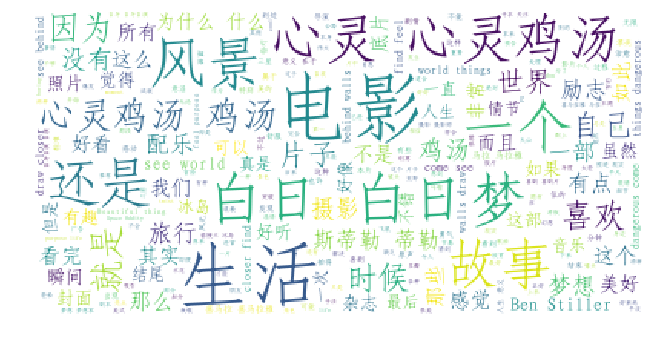

In [29]:
plt.figure(figsize=(11,11))
plt.imshow(wc)
plt.axis("off")
plt.show()